In [548]:
#import standard ML libraries
import numpy as np 
import pandas as pd 
import sklearn
import json
import string
import pandas as pd


In [549]:
#Step 1: Data Preparation
import nltk
import re
from collections import Counter
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import (  # Import various metrics from scikit-learn
    accuracy_score,  # For calculating accuracy
    roc_auc_score,  # For ROC AUC score
    confusion_matrix,  # For confusion matrix
    classification_report,  # For classification report
    f1_score  # For F1 score
)
from nltk import pos_tag
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sckdk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sckdk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sckdk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sckdk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [550]:
#Prepping the model for the data
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Concatenate all arrays into one
    all_conversations = []
    for array in data:
        all_conversations.extend(array)

    # Create a DataFrame
    df = pd.DataFrame(all_conversations)

    # Print the DataFrame
    return df

df = load_json('./combined.json')



In [551]:
df.dropna(inplace=True)

In [552]:
# Assuming 'df' is your DataFrame containing the data
corpus = ' '.join(df['utterance'])

# Tokenize the corpus into words
tokens = word_tokenize(corpus)

# Count the occurrences of each word
word_counts = Counter(tokens)

print(len(word_counts))

# Get the most common words and their frequencies
most_common_words = word_counts.most_common()

# Print the most common words
print("Most common words in the entire DataFrame:")
for word, frequency in most_common_words:
    print(word, "-", frequency)

stop_words = ['you', 'the', 'to', 'a', 'it', 'oh', 'that', 'and', 'is', 'me', 'do', 'of', 'this', 'just', 'in', 'my', 'have']

8214
Most common words in the entire DataFrame:
, - 10387
. - 9288
! - 6264
I - 4909
? - 4134
you - 3866
the - 2447
to - 2290
a - 2110
it - 1613
Oh - 1472
that - 1445
and - 1336
is - 1083
me - 1017
's - 941
do - 909
of - 900
this - 882
just - 879
in - 869
my - 859
have - 826
Yeah - 777
Okay - 763
know - 731
on - 727
You - 721
Im - 710
we - 706
not - 697
was - 681
na - 660
what - 653
with - 650
for - 646
Hey - 645
No - 633
right - 620
What - 619
be - 619
Well - 612
are - 603
so - 590
n't - 583
your - 538
gon - 505
like - 499
out - 498
go - 494
dont - 488
get - 473
about - 471
here - 448
got - 442
think - 438
can - 432
'm - 420
... - 413
all - 405
up - 404
but - 397
there - 377
So - 370
he - 369
really - 364
no - 360
one - 354
mean - 349
her - 349
at - 343
And - 339
did - 329
him - 320
if - 319
Ross - 305
its - 298
uh - 290
want - 290
see - 285
God - 282
All - 280
she - 276
Joey - 273
're - 259
now - 256
okay - 252
sorry - 248
It - 246
going - 242
youre - 235
tell - 235
would - 235
H

In [553]:
df['utterance'] = df['utterance'].astype(str)

In [554]:
#df['utterance'] = [preprocess_text(entry) for entry in df['utterance']]
# df['utterance'].dropna(inplace=True)
# df['utterance'] = [entry.lower() for entry in df['utterance']]
# df['utterance'] = [word_tokenize(entry) for entry in df['utterance']]

# tag_map = defaultdict(lambda : wn.NOUN)
# tag_map['J'] = wn.ADJ
# tag_map['V'] = wn.VERB
# tag_map['R'] = wn.ADV

# for index,entry in enumerate(df['utterance']):
#     # Declaring Empty List to store the words that follow the rules for this step
#     Final_words = []
#     # Initializing WordNetLemmatizer()
#     word_Lemmatized = WordNetLemmatizer()
#     # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
#     for word, tag in pos_tag(entry):
#         # Below condition is to check for Stop words and consider only alphabets
#         if word not in stop_words and word.isalpha():
#             word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
#             Final_words.append(word_Final)
#     # The final processed set of words for each iteration will be stored in 'text_final'
#     df.loc[index,'text_final'] = str(Final_words)

# df.head()


In [555]:
df['speaker'] = [entry.lower() for entry in df['speaker']]

#Need to figure out utterance. Let's say I don't do anything for stop words
NameEncoder = LabelEncoder()
NameEncoder.fit_transform(df['speaker'].unique())
df['speaker'] = NameEncoder.fit_transform(df['speaker'])
df.head()

,speaker,utterance,emotion,annotation
0,213,"Oh my God, hes lost it. Hes totally lost it.",non-neutral,0002120
1,174,What?,surprise,1000130
2,234,"Or! Or, we could go to the bank, close our acc...",neutral,3000200
3,35,Youre a genius!,joy,0500000
4,131,"Aww, man, now we wont be bank buddies!",sadness,0040100


In [556]:
from sklearn.model_selection import train_test_split
# Define X and Y
X = df['utterance'] # Drop the column you want to exclude from X
Y = df['emotion']

# Split the data into training and testing sets
#Train_X, Test_X, Train_Y, Test_Y = train_test_split(df['text_final'], df['emotion'], test_size=0.3, random_state=42)


In [557]:
print(X)

0           Oh my God, hes lost it. Hes totally lost it.
1                                                    What?
2        Or! Or, we could go to the bank, close our acc...
3                                         Youre a genius!
4                  Aww, man, now we wont be bank buddies!
                               ...                        
14498                                           You or me?
14499    I got it. Uh, Joey, women don't have Adam's ap...
14500                 You guys are messing with me, right?
14501                                                Yeah.
14502    That was a good one. For a second there, I was...
Name: utterance, Length: 14503, dtype: object


In [558]:
vectorizer = TfidfVectorizer()
New_X = vectorizer.fit_transform(X)
vectorizer.get_feature_names_out()

array(['00', '000', '10', ..., 'zoo', 'zuchoff', 'zygomatic'],
      dtype=object)

In [559]:
New_X.shape

(14503, 6342)

In [560]:
print(New_X)

  (0, 5742)	0.32019549217691856
  (0, 2904)	0.2939909989628141
  (0, 3307)	0.7126617838112981
  (0, 2573)	0.42703028382417096
  (0, 2381)	0.2426876488226179
  (0, 3702)	0.18841884117512048
  (0, 3893)	0.16249154842498217
  (1, 6138)	1.0
  (2, 5178)	0.35168927336677647
  (2, 351)	0.17659792872873165
  (2, 3881)	0.2152009406739976
  (2, 5618)	0.20711332121115347
  (2, 1429)	0.27306127338246217
  (2, 229)	0.12250910729302494
  (2, 102)	0.36672556954866775
  (2, 3978)	0.2191427791652702
  (2, 1138)	0.2761534027495981
  (2, 445)	0.3109482590818373
  (2, 5614)	0.21530479066591154
  (2, 5701)	0.11011553388661187
  (2, 2375)	0.16174549048088416
  (2, 1318)	0.19467137417971972
  (2, 6093)	0.13855720370028676
  (2, 3953)	0.4112791762162609
  (3, 2323)	0.8799120785677613
  :	:
  (14499, 118)	0.501221700122859
  (14499, 6224)	0.37437343716465044
  (14499, 2412)	0.25972004646516333
  (14499, 2567)	0.21332991262535503
  (14499, 5870)	0.24212728388274732
  (14499, 2968)	0.27204494405153784
  (14499, 

In [561]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(New_X, Y, test_size=0.3, random_state=42)

In [562]:
print(Train_X)

  (0, 3795)	1.0
  (1, 5233)	0.430164555829981
  (1, 2028)	0.3647384607478083
  (1, 339)	0.3756704258949942
  (1, 2568)	0.30095403802394
  (1, 5585)	0.32029749527281787
  (1, 6292)	0.29192190121242984
  (1, 2802)	0.16705759193916986
  (1, 3461)	0.16102498183641747
  (1, 2182)	0.17890895302271817
  (1, 3227)	0.18878443780765794
  (1, 3078)	0.1538305481544221
  (1, 2643)	0.212643338075029
  (1, 229)	0.1437016671313341
  (1, 5701)	0.12916415886302002
  (1, 2573)	0.18631690557779299
  (2, 4859)	0.5593212254197937
  (2, 5955)	0.46290109685285047
  (2, 3354)	0.42908758461759483
  (2, 3045)	0.3543294026871123
  (2, 3461)	0.2093726434298375
  (2, 6071)	0.23532009767569786
  (2, 5612)	0.1732442042083834
  (2, 3893)	0.18436608681389055
  (3, 3795)	0.7574776931101064
  :	:
  (10146, 1653)	0.265523071910882
  (10146, 2904)	0.19754984686682542
  (10147, 2776)	0.7592831444687491
  (10147, 5870)	0.3556636129979145
  (10147, 871)	0.32004302339568025
  (10147, 5612)	0.24523544573877423
  (10147, 2623)	0

In [563]:
Encoder = LabelEncoder()
Encoder.fit(Y)
Train_Y = Encoder.transform(Train_Y)
Test_Y = Encoder.transform(Test_Y)


In [564]:
print(Train_Y)

[0 7 5 ... 4 4 4]


In [565]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  46.311192829234656


In [566]:
labels_list = sorted(list(df['emotion'].unique()))

In [567]:
from sklearn.model_selection import cross_val_score

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

# Perform cross-validation and compute classification metrics
# Assuming Train_X_Tfidf and Train_Y are already defined
scores = cross_val_score(SVM, Train_X, Train_Y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Accuracy:", scores.mean())


# Fit the model on the entire training data
SVM.fit(Train_X, Train_Y)

# Predict on the test data
predictions = SVM.predict(Test_X)
print("Accuracy Score -> ",accuracy_score(predictions, Test_Y)*100)

Cross-Validation Accuracy: 0.4998018399536253
Accuracy Score ->  50.01149161112388


In [568]:
report = classification_report(Test_Y, predictions, target_names=labels_list, digits=4)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       anger     0.3077    0.0165    0.0314       242
     disgust     0.6667    0.0404    0.0762        99
        fear     0.0000    0.0000    0.0000        61
         joy     0.5136    0.2538    0.3398       520
     neutral     0.5055    0.9173    0.6518      1959
 non-neutral     0.2751    0.0630    0.1026       825
     sadness     0.4464    0.1462    0.2203       171
    surprise     0.5934    0.3418    0.4337       474

    accuracy                         0.5001      4351
   macro avg     0.4136    0.2224    0.2320      4351
weighted avg     0.4556    0.5001    0.4129      4351



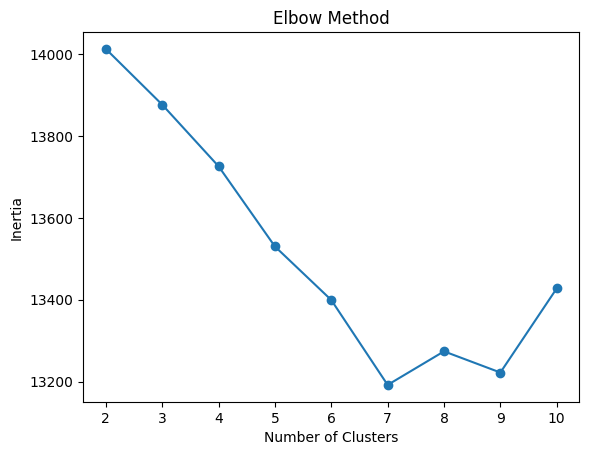

In [569]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 2: Find the optimal number of clusters using the elbow method
inertia = []
max_clusters = 10  # Maximum number of clusters to consider
for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(New_X)
    inertia.append(kmeans.inertia_)

# Plot the inertia to find the elbow point
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [570]:
# Step 4: Apply K-Means clustering with the chosen number of clusters
optimal_n_clusters = 7  # Example: choose the number of clusters based on the elbow method
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(X_tfidf)

# Step 5: Interpret clusters
# Extract cluster centroids
cluster_centers = kmeans.cluster_centers_

# Print top words for each cluster
print("Top words per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(optimal_n_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f"  {terms[ind]}")
    print()

Top words per cluster:
Cluster 0:
  disgusting
  fulfilled
  chinese
  fabulous
  expose
  electricity
  bike
  cushion
  fact
  chicky

Cluster 1:
  cushion
  buy
  cracker
  expose
  chinese
  crowd
  fulfilled
  front
  fierce
  calm

Cluster 2:
  fulfilled
  fang
  disappear
  between
  expression
  ahhh
  expose
  construction
  advice
  attacker

Cluster 3:
  chinese
  crowd
  caught
  expression
  expose
  advice
  clinton
  fang
  chicky
  flung

Cluster 4:
  force
  fulfilled
  ahhh
  clinton
  bigot
  between
  chicky
  caught
  chinese
  abott

Cluster 5:
  front
  cushion
  expose
  fool
  event
  divorce
  cute
  fulfilled
  chinese
  flung

Cluster 6:
  cute
  chinese
  ahhh
  caterpillar
  button
  expose
  cushion
  fulfilled
  flung
  assure



In [571]:
from collections import Counter

# Step 6: Assign data points to clusters
cluster_assignments = kmeans.labels_

# Step 7: Find top emotions for each cluster
cluster_emotions = {}
for cluster_id in range(optimal_n_clusters):
    # Filter data points belonging to the current cluster
    cluster_indices = [i for i, label in enumerate(cluster_assignments) if label == cluster_id]
    cluster_data_points = [Y[i] for i in cluster_indices]
    
    # Count the occurrences of each emotion in the cluster
    emotion_counts = Counter(cluster_data_points)
    
    # Sort emotions by their counts in descending order
    sorted_emotions = sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Store the top emotions for the cluster
    cluster_emotions[cluster_id] = sorted_emotions

# Print top emotions for each cluster
for cluster_id, emotions in cluster_emotions.items():
    print(f"Cluster {cluster_id}:")
    for emotion, count in emotions[:5]:  # Print top 5 emotions for each cluster
        print(f"  {emotion}: {count} occurrences")
    print()

Cluster 0:
  surprise: 97 occurrences
  neutral: 40 occurrences
  non-neutral: 26 occurrences
  joy: 17 occurrences
  sadness: 8 occurrences

Cluster 1:
  surprise: 248 occurrences
  neutral: 207 occurrences
  non-neutral: 146 occurrences
  joy: 110 occurrences
  disgust: 25 occurrences

Cluster 2:
  neutral: 1523 occurrences
  non-neutral: 711 occurrences
  joy: 364 occurrences
  surprise: 363 occurrences
  anger: 263 occurrences

Cluster 3:
  neutral: 3994 occurrences
  non-neutral: 1740 occurrences
  joy: 1123 occurrences
  surprise: 669 occurrences
  anger: 446 occurrences

Cluster 4:
  neutral: 275 occurrences
  surprise: 256 occurrences
  non-neutral: 81 occurrences
  anger: 16 occurrences
  fear: 10 occurrences

Cluster 5:
  neutral: 249 occurrences
  joy: 65 occurrences
  non-neutral: 42 occurrences
  surprise: 17 occurrences
  sadness: 11 occurrences

Cluster 6:
  neutral: 242 occurrences
  non-neutral: 26 occurrences
  joy: 24 occurrences
  surprise: 7 occurrences
  fear: 6 o

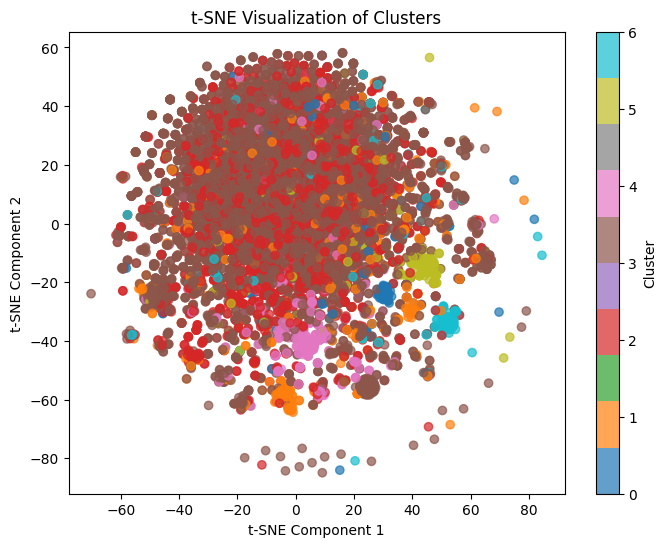

In [572]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 8: Visualize clusters using t-SNE
# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42, init="random")
X_tsne = tsne.fit_transform(New_X)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_assignments, cmap='tab10', alpha=0.7)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()